### CONTENT

-Gender: Gender of the passengers (Female, Male)

-Customer Type: The customer type (Loyal customer, disloyal customer)

-Age: The actual age of the passengers

-Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

-Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

-Flight distance: The flight distance of this journey

-Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

-Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

-Ease of Online booking: Satisfaction level of online booking

-Gate location: Satisfaction level of Gate location

-Food and drink: Satisfaction level of Food and drink

-Online boarding: Satisfaction level of online boarding

-Seat comfort: Satisfaction level of Seat comfort

-Inflight entertainment: Satisfaction level of inflight entertainment

-On-board service: Satisfaction level of On-board service

-Leg room service: Satisfaction level of Leg room service

-Baggage handling: Satisfaction level of baggage handling

-Check-in service: Satisfaction level of Check-in service

-Inflight service: Satisfaction level of inflight service

-Cleanliness: Satisfaction level of Cleanliness

-Departure Delay in Minutes: Minutes delayed when departure

-Arrival Delay in Minutes: Minutes delayed when Arrival

-Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Airline Passengers Satisfaction

In [982]:
import seaborn as sns
from IPython.display import display
from keras import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from plotnine import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from plotnine import *
import matplotlib.gridspec as gridspec
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import AdaBoostClassifier
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [832]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [833]:
# appending one to another to use in Ex 2 - 4 
df = df_train.append(df_test)

In [834]:
display(df)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [835]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [837]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

# Data Preprocessing

##### Displaying Categorical Values Columns

In [838]:
cat_cols = [ 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness','Gender','Customer Type','Type of Travel','Class']

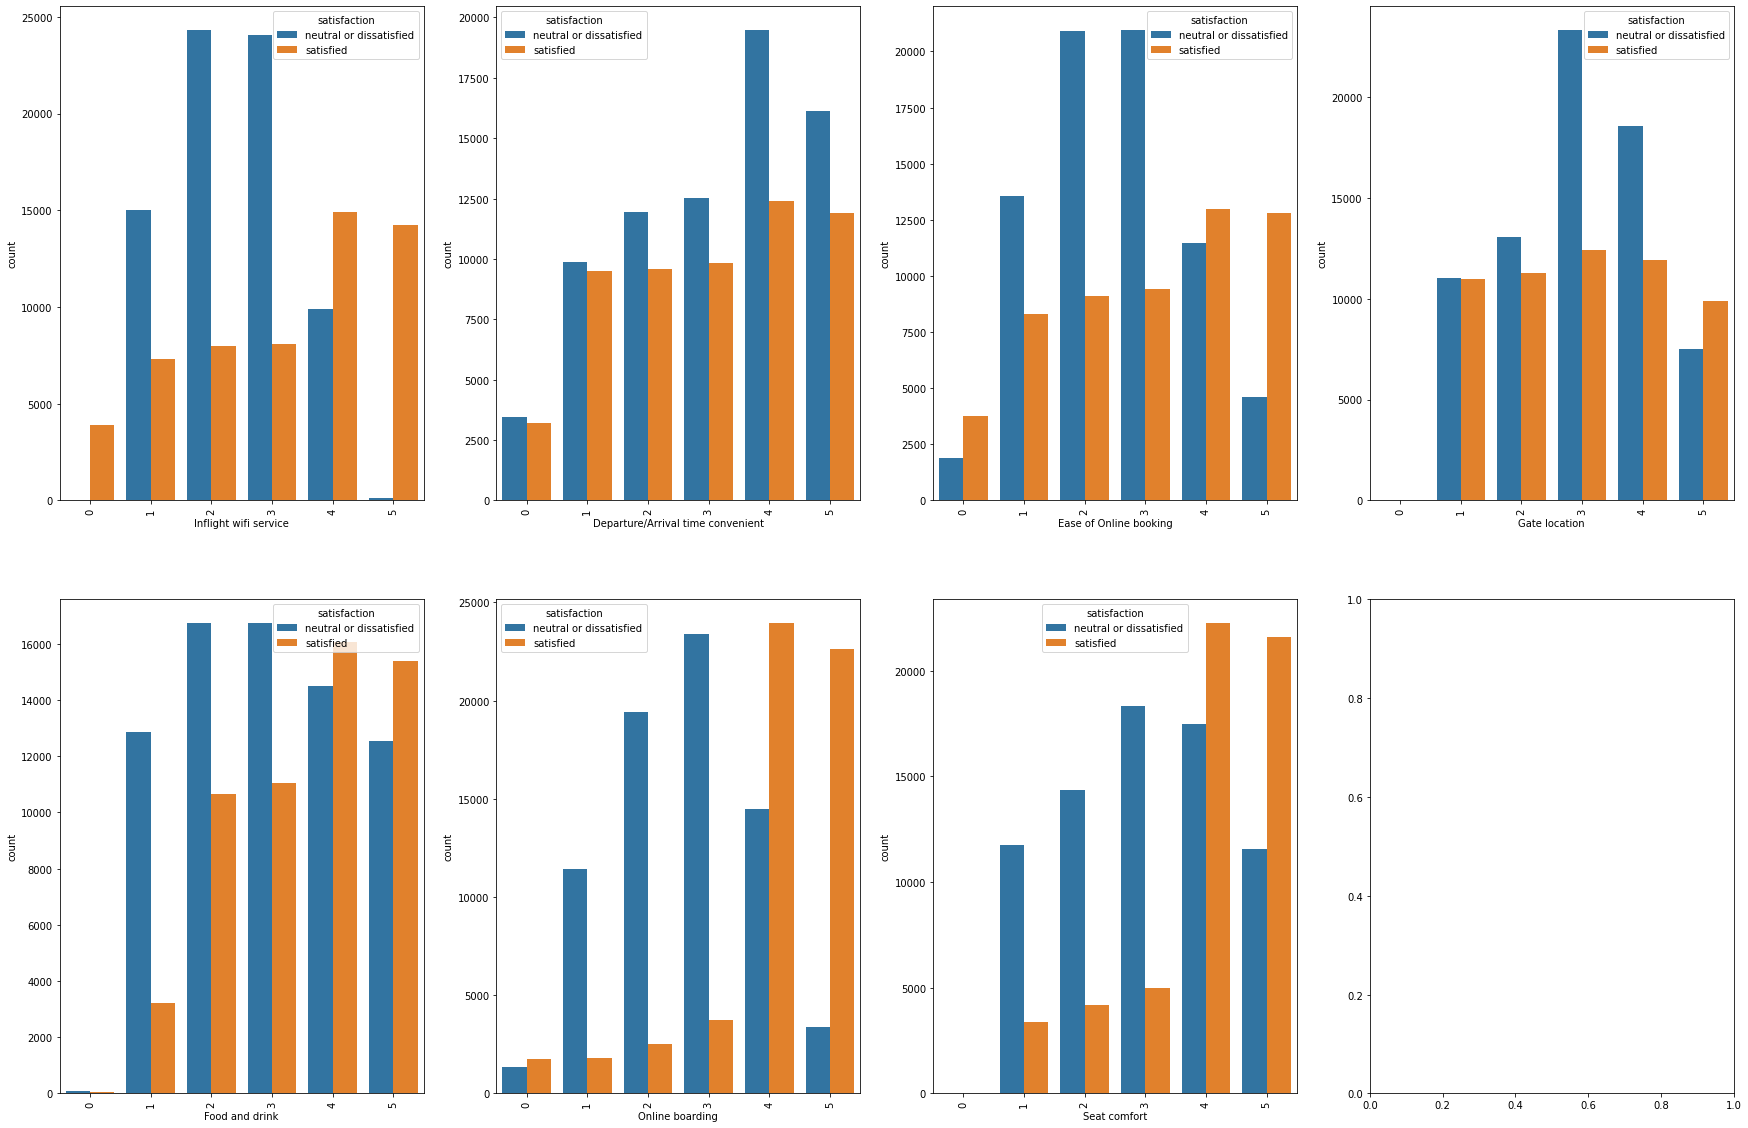

In [839]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(cat_cols[:7], ax.flatten()):
    sns.countplot(df[variable],hue=df['satisfaction'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

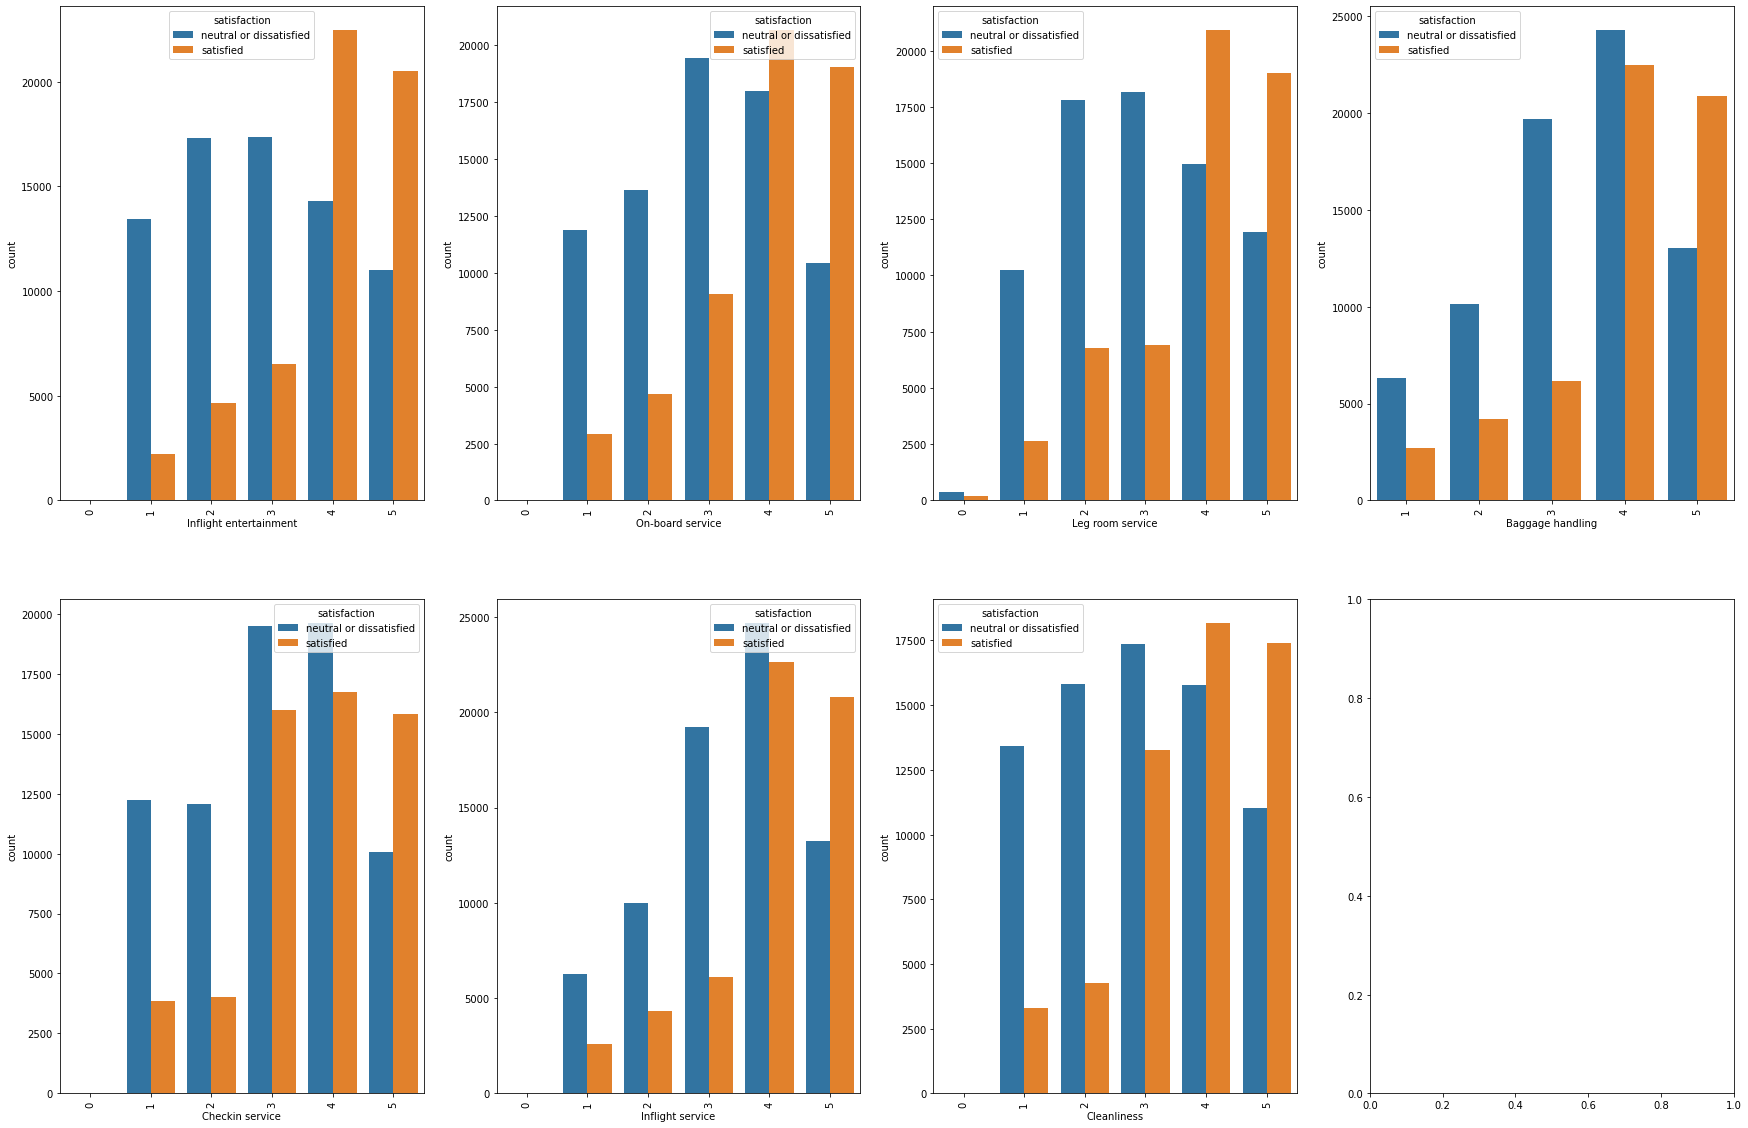

In [840]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(cat_cols[7:14], ax.flatten()):
    sns.countplot(df[variable],hue=df['satisfaction'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

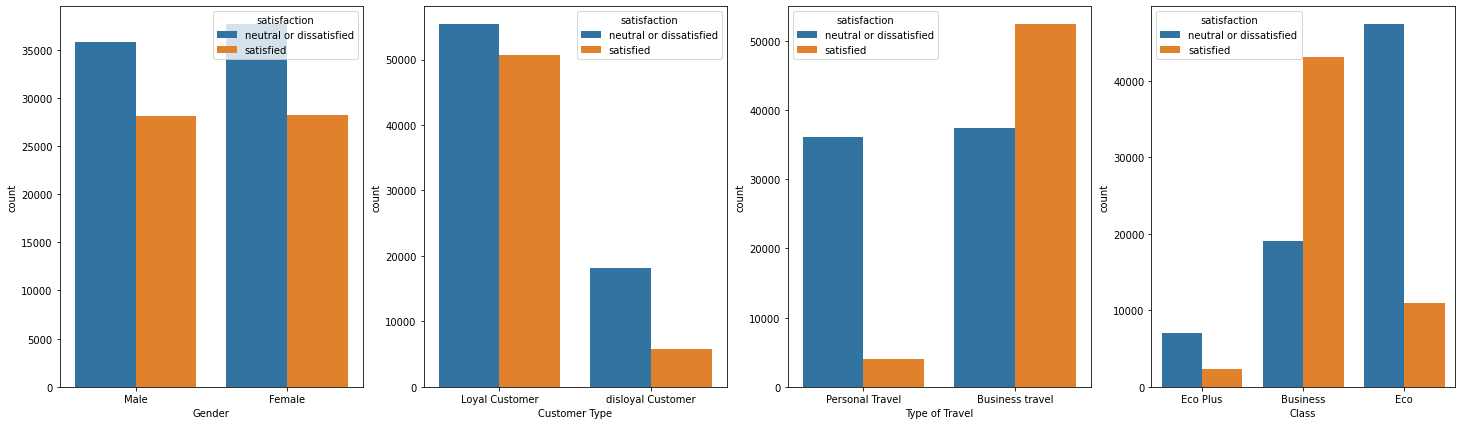

In [841]:
fig, ax = plt.subplots(1,4, figsize=(25, 7))
for variable, subplot in zip(cat_cols[14:], ax.flatten()):
    sns.countplot(df[variable],hue=df['satisfaction'], ax=subplot)

#### Displaying Numerical Columns

In [842]:
num_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

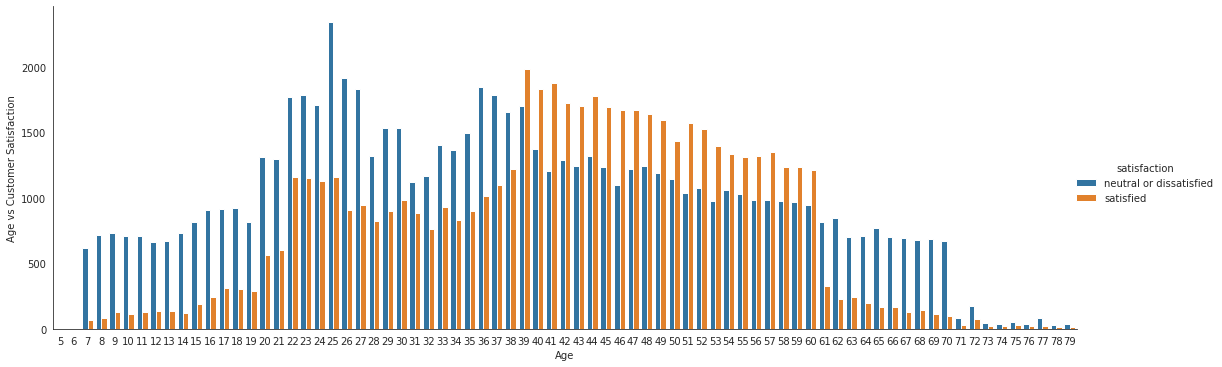

In [843]:
with sns.axes_style('white'):
    g = sns.catplot('Age', data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Customer Satisfaction')

We se that Customers aged between 39 and 60 seem to be more satisfied.

Count of Customers who was satisfied, and who was neutral or dissatisfied
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


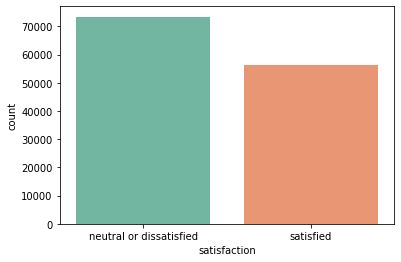

In [844]:
print('Count of Customers who was satisfied, and who was neutral or dissatisfied')
print(df['satisfaction'].value_counts())
sns.countplot(x='satisfaction', data=df, palette='Set2')
plt.show()

Here we can see how many people were satisfied from the flies, and how many were neutral or dissatisfied.

Count of Classes
------------
2 : Business, 1 : Eco Plus , 0: Eco
------------
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


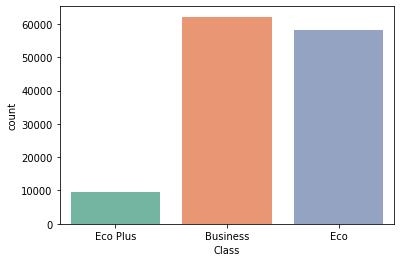

In [845]:
print('Count of Classes')
print('------------')
print('2 : Business, 1 : Eco Plus , 0: Eco')
print('------------')
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df, palette='Set2')
plt.show()  

## Correlation Matrix

##### The correlation between features. we can conclude that there is high correlation between SibSp and Parch features thats describe the family relations.

In [846]:
df
cor_df = df.drop(['Unnamed: 0', 'id'], axis =1 )

<AxesSubplot:>

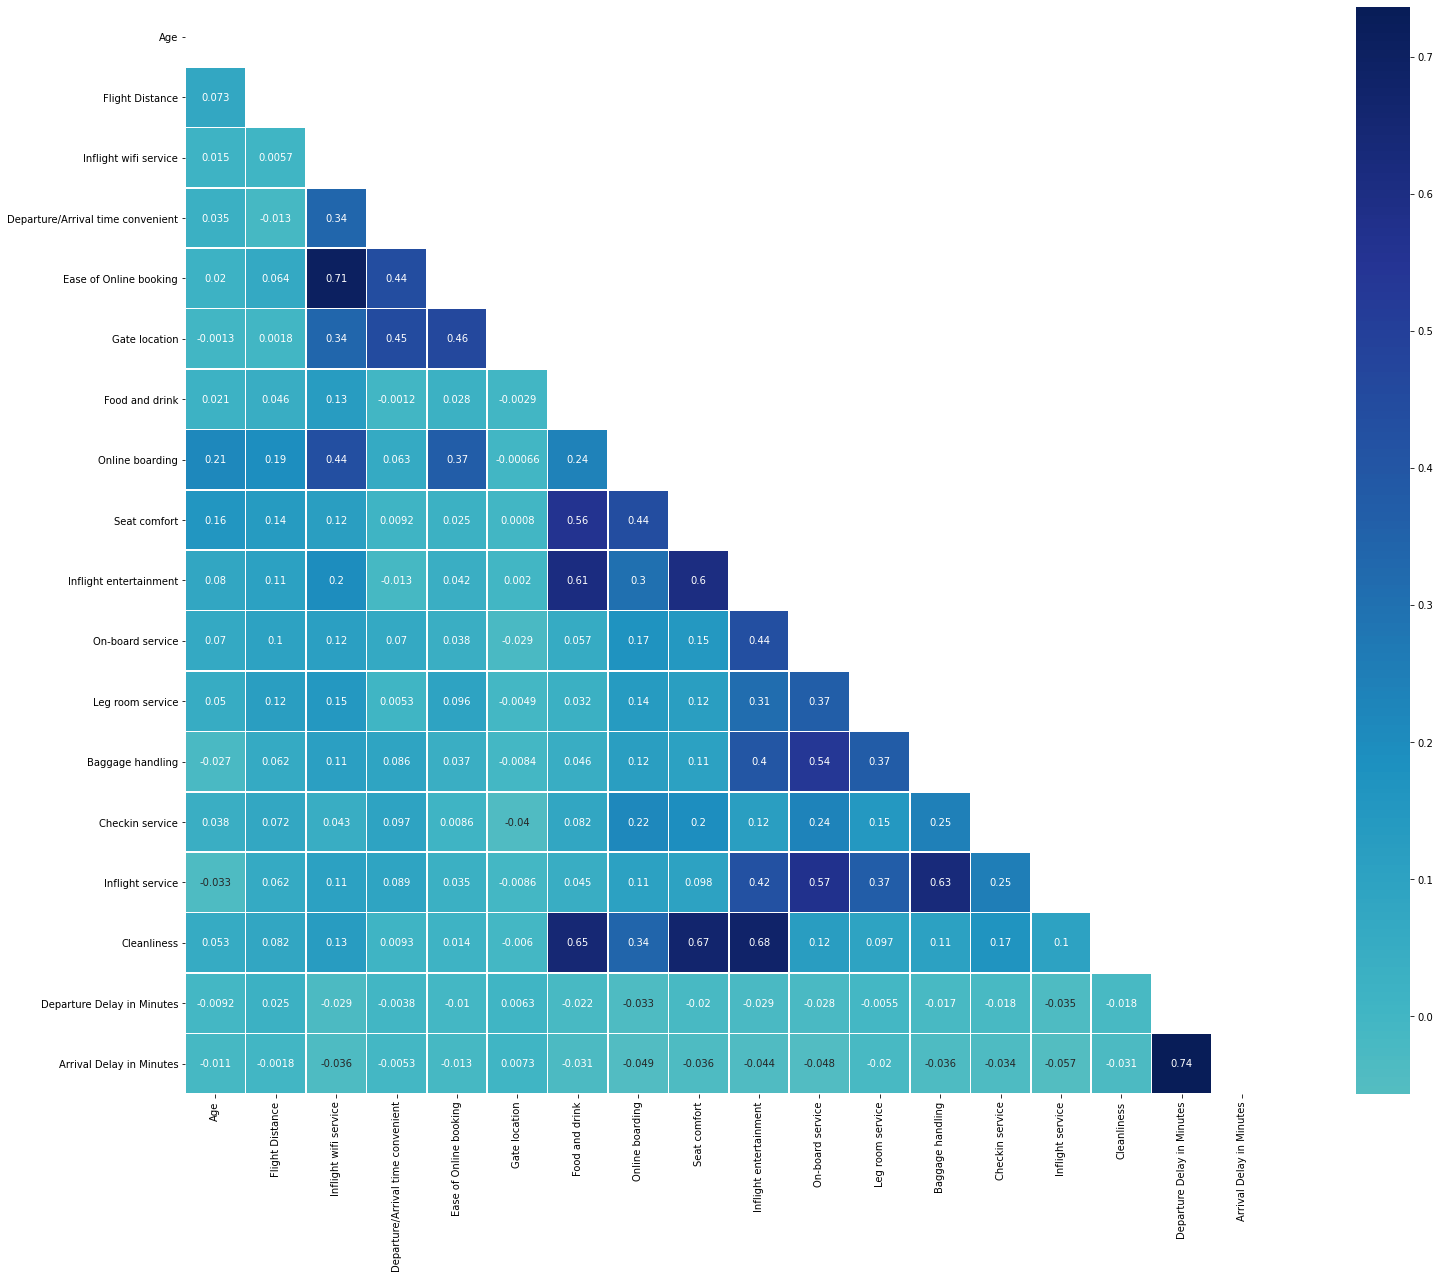

In [847]:
corr = cor_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

###### By looking on the correlation matrix we find out that:
- Best features - Online Booking, Class, and Type of Travel
- Worst features - Gate location, Gender, and Departure/Arrival Time Convenient

# Clustering and Feature Importance

##### Transform data from strings to nuemirical values.

Descriptive statistics about each one of the features that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [848]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


As we can see, if the Average delay is high, the customer is dissatisfied or neutral

#### Scaling

In [849]:
def conv_cat(data):
    data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.drop('Unnamed: 0',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data

cluster_df = df
cluster_df = conv_cat(cluster_df)

In [850]:
numerical_cols = ["Age" , "Flight Distance" ,"Departure Delay in Minutes" , "Arrival Delay in Minutes"]
y_col = "satisfaction"
categorical_cols = list(set(cluster_df.columns).difference(set(numerical_cols)))
categorical_cols.remove('satisfaction')
categorical_df = cluster_df[categorical_cols]
mms = MinMaxScaler()
numerical_df = pd.DataFrame(mms.fit_transform(cluster_df[numerical_cols]) , columns=numerical_cols)

X = categorical_df.join(numerical_df)
y = cluster_df[y_col]

## Clustering

Elbow Method

Text(0, 0.5, 'distortions')

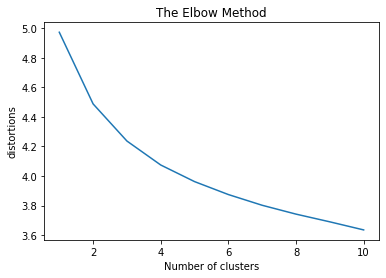

In [851]:
# ---------------------------The Elbow Method---------------------------
from scipy.spatial.distance import cdist
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('distortions')

In [852]:
# ---------------------------Using graph K will be 2---------------------------

k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_k_means = k_means.fit_predict(X)
data = X.copy()
data['cluster'] = y_k_means

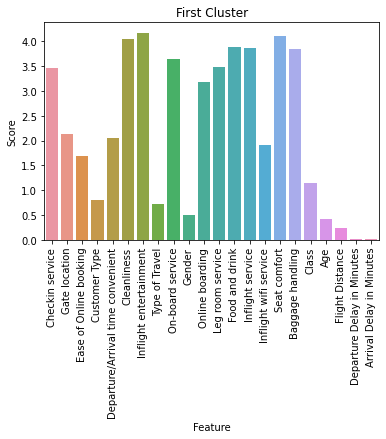

In [853]:
c1 = data[data['cluster'] == 0]
c1.drop(c1.columns[len(c1.columns)-1], axis=1, inplace=True)
sns.barplot(c1.columns, c1.mean())
plt.xlabel("Feature")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.title("First Cluster")
plt.show()


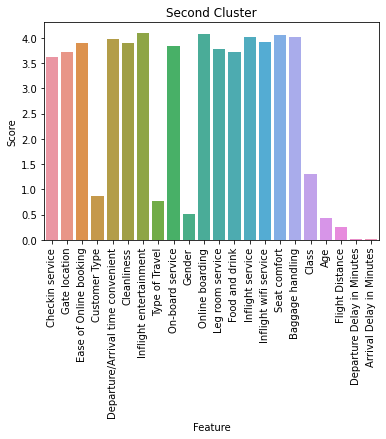

In [854]:
c1 = data[data['cluster'] == 1]
c1.drop(c1.columns[len(c1.columns)-1], axis=1, inplace=True)
sns.barplot(c1.columns, c1.mean())
plt.xlabel("Feature")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.title("Second Cluster")
plt.show()


In [855]:
ohe = OneHotEncoder(drop="first")
cat_df = pd.DataFrame(ohe.fit_transform(cluster_df[categorical_cols]).todense() , columns=ohe.get_feature_names(categorical_cols))
mms = MinMaxScaler()
num_df = pd.DataFrame(mms.fit_transform(cluster_df[numerical_cols]) , columns=numerical_cols)

X = cat_df.join(num_df)
y = cluster_df[y_col]

Clustering

In [856]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [857]:
tsne = TSNE(2 , n_iter=250)
transformed_df = tsne.fit_transform(X)

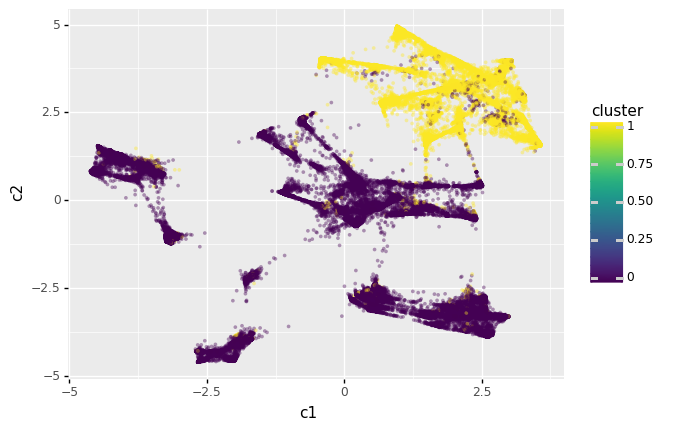

<ggplot: (140175525364)>

In [858]:
(
    ggplot(pd.DataFrame({"c1" : transformed_df[: , 0]
                        ,"c2" : transformed_df[: , 1]
                        ,"cluster" : kmeans.labels_}) , aes(x="c1" , y="c2" , fill="cluster"))
    + geom_point(alpha=0.4 , stroke=0)
)

Clustering with subset of the cols

In [859]:
cat_cols = ['Gender','Customer Type','Type of Travel','Class']
num_cols = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

ohe = OneHotEncoder(drop="first")
cat_df = pd.DataFrame(ohe.fit_transform(cluster_df[cat_cols]).todense() , columns=ohe.get_feature_names(cat_cols))
mms = MinMaxScaler()
num_df = pd.DataFrame(mms.fit_transform(cluster_df[num_cols]) , columns=num_cols)

X = cat_df.join(num_df)
y = cluster_df[y_col]
X

,Gender_1,Customer Type_1,Type of Travel_1,Class_1,Class_2,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,1.0,0.0,0.076923,0.086632,0.015704,0.011364
1,0.0,0.0,1.0,0.0,1.0,0.230769,0.041195,0.000628,0.003788
2,1.0,1.0,1.0,0.0,1.0,0.243590,0.224354,0.000000,0.000000
3,1.0,1.0,1.0,0.0,1.0,0.230769,0.107229,0.006910,0.005682
4,0.0,1.0,1.0,0.0,1.0,0.692308,0.036955,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
129875,0.0,0.0,1.0,0.0,1.0,0.346154,0.099960,0.000000,0.000000
129876,0.0,1.0,1.0,0.0,1.0,0.205128,0.124192,0.000000,0.000000
129877,1.0,1.0,0.0,0.0,0.0,0.128205,0.160945,0.000000,0.000000
129878,0.0,1.0,1.0,0.0,1.0,0.089744,0.221325,0.000000,0.000000


In [860]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [861]:
tsne = TSNE(2 , n_iter=250)
result_df = tsne.fit_transform(X)

(
    ggplot(pd.DataFrame({"c1" : result_df[: , 0]
                        ,"c2" : result_df[: , 1]
                        ,"cluster" : kmeans.labels_}) , aes(x="c1" , y="c2" , fill="cluster"))
    + geom_point(alpha=0.4 , stroke=0)
)

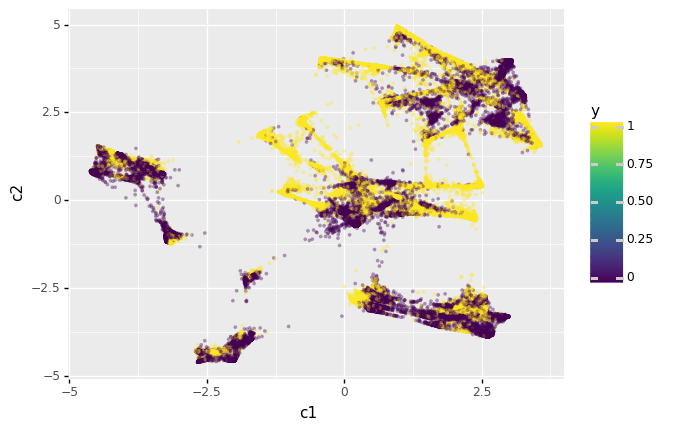

<ggplot: (140245719218)>

In [862]:
(
    ggplot(pd.DataFrame({"c1" : transformed_df[: , 0]
                        ,"c2" : transformed_df[: , 1]
                        ,"y" : y}) , aes(x="c1" , y="c2" , fill="y"))
    + geom_point(alpha=0.4 , stroke=0)
)

Note : Clustering as we did first is better after looking at the clusters seperation result by Tsne.

In [863]:
pca_num = ['Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
X_pca= cluster_df[pca_num]
X_pca

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
25971,34,526,0,0.0
25972,23,646,0,0.0
25973,17,828,0,0.0
25974,14,1127,0,0.0


Scaling

In [864]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_pca)

In [865]:
pca = PCA()
X_std = pca.fit_transform(X_std)
X_std = pd.DataFrame(X_std)
X_std.head()

,0,1,2,3
0,0.272615,-1.749913,0.716896,0.141159
1,-0.405607,-1.357039,0.002222,-0.084032
2,-0.536731,-0.668168,0.599438,0.004938
3,-0.165090,-1.121920,0.231722,0.045466
4,-0.570406,0.309372,-1.695717,0.004862


In [866]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48989935, 0.27483883, 0.22511028, 0.01015153])

In [867]:
X_std['target']=y.tolist()
X_std.columns = ['PC1','PC2','PC3','PC4','target']
X_std.head()

,PC1,PC2,PC3,PC4,target
0,0.272615,-1.749913,0.716896,0.141159,0
1,-0.405607,-1.357039,0.002222,-0.084032,0
2,-0.536731,-0.668168,0.599438,0.004938,1
3,-0.165090,-1.121920,0.231722,0.045466,0
4,-0.570406,0.309372,-1.695717,0.004862,1


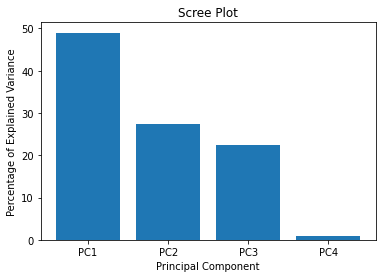

In [868]:
per_var = np.round(explained_variance* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Plot using PC1 and PC2

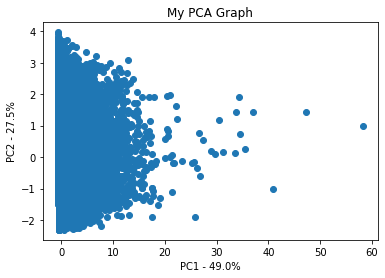

In [869]:
#pca_df = pd.DataFrame(X_pca, index=[*wt, *ko], columns=labels)
 
plt.scatter(X_std.PC1, X_std.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in X_std.index:
#    plt.annotate(sample, (X_std.PC1.loc[sample], X_std.PC2.loc[sample]))
plt.show()

In [870]:
loading_scores = pd.Series(pca.components_[0], index=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_3 = sorted_loading_scores[0:5].index.values
print(loading_scores[top_3])

Arrival Delay in Minutes      0.707036
Departure Delay in Minutes    0.707016
Age                          -0.015046
Flight Distance              -0.001243
dtype: float64


Most Important Features in the numerical features are: Arrival Delay in Minutes, Departure Delay in Minutes

#### Chi Square

In [871]:
chi_df = cluster_df

In [872]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(chi_df)
modified_data = pd.DataFrame(r_scaler.transform(chi_df), columns=chi_df.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,0.076923,0.0,0.5,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0
1,0.0,0.0,0.230769,1.0,1.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0
2,1.0,1.0,0.243590,1.0,1.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0
3,1.0,1.0,0.230769,1.0,1.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0
4,0.0,1.0,0.692308,1.0,1.0,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0


In [873]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])


Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


##### Wrapper Method

##### Feature Permutation Importance

In [ ]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

###### Combining multiple methods to check Feature importance as we see above, the following features are have the most affect on customer satisfaction: 
Type of Travel, Inflight wifi service, Online boarding, Seat comfort,Class, Flight Distance, Inflight entertainment, On board service, Leg room service, Cleanliness, Checkin service, Inflight service, Baggage handling

# Classification

Imputation and Preprocessing of the data

In [ ]:
train = df_train
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
train.columns = [c.replace(' ', '_') for c in train.columns]
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [ ]:
test = df_test
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
test.columns = [c.replace(' ', '_') for c in test.columns]
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

# Building Models
From all above results, finally we can combine and conclude the list of important features.

Really Important Features: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

Important Features: Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

In [ ]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

In [ ]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(0)
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(0)
train.select_dtypes(include=['object']).columns
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [ ]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(0)
# Check the list of categorical variables
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### Additional Visualizations

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Type of Travel, Class, Flight Distance: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

In [ ]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

Checkin Service, Inflight Service, On-board Service, Leg-room Service: For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.

### Label Encoding of Categorical Variables

In [ ]:
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [ ]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

Outliers Detection and Removal

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

Top 10 Feature Selection through Chi-Square

In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.
Feature Importance using Wrapper Method

In [ ]:

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.

Feature Permutation Importance

In [ ]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

From all above results, finally we can combine and conclude the list of important features.
Really Important Features: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

Important Features: Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

In [ ]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']


In [ ]:
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable

### 1- Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

## 2- Random Forest


In [ ]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


Well, we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see how many decision trees are minimally required make the Accuarcy consistent (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).


In [ ]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, it is evident that minimum 40 trees are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

## 3- Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [ ]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

it can be sawn in the graph that minimum 40 trees are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

### 4- Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

### 5- XgBoost

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [ ]:
roc_auc_scores = [roc_auc_dt, roc_auc_rf, roc_auc_nn, roc_auc_adab, roc_auc_xgb]
tt = [tt_dt, tt_rf, tt_nn, tt_adab, tt_xgb]
model_data = {'Model': ['Decision Tree','Random Forest','Neural Network','AdaBoost', 'XGBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
models = ['Decision Tree','Random Forest','Neural Network','AdaBoost', 'XGBoost']
modelsTable = pd.DataFrame(list(zip(models, roc_auc_scores,tt )),
               columns =['Model', 'AUC', 'Time taken'])
modelsTable

#### Conclusion
We observe, Random Forest, AdaBoost and XgBoost have performed equally well on producing high ROC_AUC score (90%). But Random Forest has taken lesser amount of time compared to time taken by AdaBoost.

## Making a new numerical measure for satisfaction using some features


On light of previous sections, we observed the importance of features specially with Feature PermutationImportance, and we decided to stick with the following features for the next section: Inflight service, Inflight wifi service, Online boarding, Seat comfort

### Data preparing

In [1169]:
train = df_train
test = df_test

In [1170]:
train = train.drop(['Unnamed: 0', 'id', 'satisfaction'], axis =1)
test = test.drop(['Unnamed: 0', 'id', 'satisfaction'], axis =1)

In [1171]:
## dataframes used for b
label_features = ['Inflight service', 'Inflight wifi service', 'Online boarding', 'Seat comfort']
train['label'] = (train['Inflight service'] +train['Inflight wifi service']+train['Online boarding']+train['Seat comfort'])/4
test['label'] = (train['Inflight service'] +train['Inflight wifi service']+train['Online boarding']+train['Seat comfort'])/4

train_dropped = train[label_features]
test_dropped = test[label_features]

train.drop(label_features, axis=1, inplace = True)
test.drop(label_features, axis=1, inplace = True)

###### transforming numerical values:

Changing ages to be in ranges:

between 0 and 20 : 0
between 20 and 38 : 1
between 39 and 61 : 2
higher than 61 : 3

In [1172]:
## train dataframe
train.loc[(train['Age'] <20), 'Age'] = 0
train.loc[(train['Age'] >=20) & (train['Age']<39), 'Age'] = 1
train.loc[(train['Age'] >38) & (train['Age']<62), 'Age'] = 2
train.loc[(train['Age'] >=62), 'Age'] = 3
# test dataframe
test.loc[(test['Age'] <20), 'Age'] = 0
test.loc[(test['Age'] >=20) & (test['Age']<39), 'Age'] = 1
test.loc[(test['Age'] >38) & (test['Age']<62), 'Age'] = 2
test.loc[(test['Age'] >=62), 'Age'] = 3

##### transforming some categorical values

In [1173]:
# on train dataframe
train['Customer Type'] = train['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
train['Type of Travel'] = train['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
train['Class'] = train['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
train['Gender'] = train['Gender'].map({'Male':1, 'Female':0})
train.fillna(0,inplace=True)
# on test dataframe
test['Customer Type'] = test['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
test['Type of Travel'] = test['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
test['Class'] = test['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
test['Gender'] = test['Gender'].map({'Male':1, 'Female':0})
test.fillna(0,inplace=True)


scaling

###### Regression
splitting datasets

In [1174]:
xtrain = train.drop("label",axis=1)
xtest  = test.drop("label",axis=1)
ytrain = train["label"]
ytest  = test["label"]

In [1175]:
from sklearn.ensemble import AdaBoostRegressor

###### First algorithm:  adaboost regressor

In [1176]:

model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
print(model_ABR)

expected_y  = y_test
predicted_y = model_ABR.predict(X_test)

AdaBoostRegressor()


In [1177]:
X_train = xtrain
X_test = xtest
y_train = ytrain
y_test = ytest

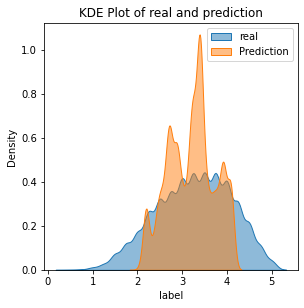

In [1178]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(y_test,alpha=0.5,label="real",shade=True)
sns.kdeplot(y_pred,alpha=0.5,label="Prediction",shade=True)
plt.title("KDE Plot of real and prediction")
plt.legend()

In [1179]:
print('--------------- Evaluation Adaboost -------------------')
adb_msle1 = metrics.mean_squared_log_error(y_test, predicted_y)
print('Mean Squared Log Error:', adb_msle1)

--------------- Evaluation Adaboost -------------------
Mean Squared Log Error: 0.055114699260230236


###### Second Algorithm : Random Forest Regressor

In [1180]:
X_train = xtrain
X_test = xtest
y_train = ytrain
y_test = ytest

In [1181]:
my_forest = RandomForestRegressor(random_state=100)
my_forest = my_forest.fit(X_train, y_train)
my_forest_prediction =  my_forest.predict(X_test)

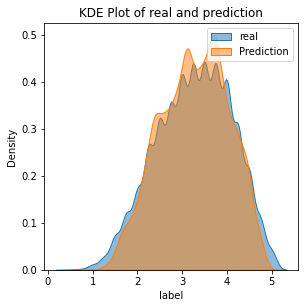

In [1182]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(y_test,alpha=0.5,label="real",shade=True)
sns.kdeplot(my_forest_prediction,alpha=0.5,label="Prediction",shade=True)
plt.title("KDE Plot of real and prediction")
plt.legend()

In [1183]:
print('--------------- Evaluation Random Forest -------------------')
rf_msle1 =metrics.mean_squared_log_error(y_test, my_forest_prediction)
print('Mean Squared Log Error:', rf_msle1)

--------------- Evaluation Random Forest -------------------
Mean Squared Log Error: 0.07858648938710082


######  merging back the dropped features

In [1184]:
train = train.merge(train_dropped, left_index=True, right_index=True)
test = test.merge(test_dropped, left_index=True, right_index=True)
xtrain = train.drop("label",axis=1)
xtest  = test.drop("label",axis=1)
ytrain = train["label"]
ytest  = test["label"]

###### First algorithm:  adaboost regressor

In [1185]:
X_train = xtrain
X_test = xtest
y_train = ytrain
y_test = ytest

In [1186]:
RSEED = 50
adb = AdaBoostRegressor(n_estimators=100,random_state=RSEED,learning_rate=0.1, loss= 'linear')
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)

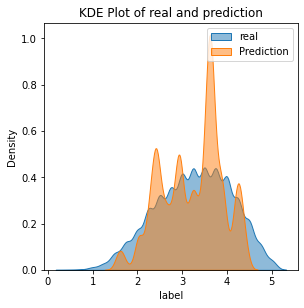

In [1187]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(y_test,alpha=0.5,label="real",shade=True)
sns.kdeplot(y_pred,alpha=0.5,label="Prediction",shade=True)
plt.title("KDE Plot of real and prediction")
plt.legend()

In [1188]:
print('--------------- Evaluation Adaboost -------------------')
adb_msle2 =metrics.mean_squared_log_error(y_test, y_pred)
print('Mean Squared Log Error:', adb_msle2)

--------------- Evaluation Adaboost -------------------
Mean Squared Log Error: 0.07204050437681456


###### Second Algorithm : Random Forest Regressor

In [1189]:
X_train = xtrain
X_test = xtest
y_train = ytrain
y_test = ytest

In [1190]:
my_forest = RandomForestRegressor(random_state=RSEED)
my_forest = my_forest.fit(X_train, y_train)
my_forest_prediction =  my_forest.predict(X_test)

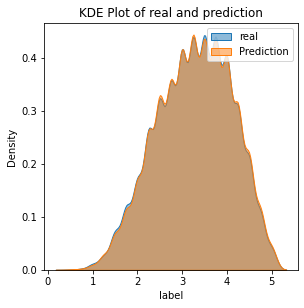

In [1191]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(y_test,alpha=0.5,label="real",shade=True)
sns.kdeplot(my_forest_prediction,alpha=0.5,label="Prediction",shade=True)
plt.title("KDE Plot of real and prediction")
plt.legend()

In [1192]:
print('--------------- Evaluation Random Forest -------------------')
rf_msle2 =metrics.mean_squared_log_error(y_test, my_forest_prediction)
print('Mean Squared Log Error:', rf_msle2)

--------------- Evaluation Random Forest -------------------
Mean Squared Log Error: 0.08685378693936349


In [1193]:
lst1= [adb_msle1,adb_msle2]
lst2 = [rf_msle1,rf_msle2]

result_df = pd.DataFrame(list(zip(['Feature Dropped', 'With Features'], lst1,lst2)),
               columns =['Values of', 'Adaboost','Random Forest'])
result_df

,Values of,Adaboost,Random Forest
0,Feature Dropped,0.055115,0.078586
1,With Features,0.072041,0.086854


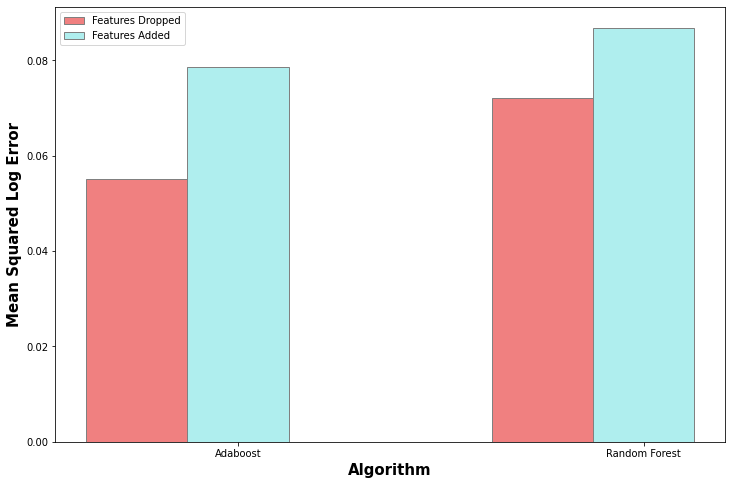

In [1194]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 

# Set position of bar on X axis
br1 = np.arange(len(lst1))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, lst1, color ='lightcoral', width = barWidth,
        edgecolor ='grey', label ='Features Dropped')
plt.bar(br2, lst2, color ='paleturquoise', width = barWidth,
        edgecolor ='grey', label ='Features Added')

# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean Squared Log Error', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(lst1))],
        ['Adaboost', 'Random Forest'])
 
plt.legend()
plt.show()